## Proyecto 3. Entrega 1
### Analsisis Exploratorio Violencia Intrafamiliar 
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 223305 - Esteban Zambrano 22119

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analisis de Variables

In [3]:
path = "./data/vif"
files = os.listdir(path)
print("Archivos en la carpeta:", files)

dfs = {file[:-4]: pd.read_csv(os.path.join(path, file)) for file in files if file.endswith(".csv")}

Archivos en la carpeta: ['VifAlfa.csv', 'VifAreaSexoEdad.csv', 'VifEscolaridad.csv', 'VifPuebloSexoRelacion.csv']


### Prueba de Normalidad

In [11]:
columnas_a_convertir = {
    "VifAlfa": ["Total", "Alfabeta", "Analfabeta", "Ignorado"],
    "VifAreaSexoEdad": ["Total", "UrbanM", "UrbanH", "Rural", "RuralM", "RuralH", "Ignorado", "IgnoradoH", "IgnoradoM"],
    "VifEscolaridad": ["Total", "Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"],
    "VifPuebloSexoRelacion": ["Garífunas", "Xinkas", "Otro", "Ignorado"]
}

for name, df in dfs.items():
    if name in columnas_a_convertir:
        columnas = columnas_a_convertir[name] 

        # Reemplazar '-' por NaN antes de la conversión
        df[columnas] = df[columnas].replace("-", np.nan)

        # Convertir a numérico solo las columnas seleccionadas
        df[columnas] = df[columnas].apply(pd.to_numeric, errors="coerce")

        print(f"✅ {name}: Columnas convertidas a numérico -> {columnas}")

✅ VifAlfa: Columnas convertidas a numérico -> ['Total', 'Alfabeta', 'Analfabeta', 'Ignorado']
✅ VifAreaSexoEdad: Columnas convertidas a numérico -> ['Total', 'UrbanM', 'UrbanH', 'Rural', 'RuralM', 'RuralH', 'Ignorado', 'IgnoradoH', 'IgnoradoM']
✅ VifEscolaridad: Columnas convertidas a numérico -> ['Total', 'Ninguno', 'Primaria', 'Básico', 'Diversificado', 'Universitario', 'Ignorado']
✅ VifPuebloSexoRelacion: Columnas convertidas a numérico -> ['Garífunas', 'Xinkas', 'Otro', 'Ignorado']


********************************************************************************************

🔹 **Analizando archivo: VifAlfa**

⚠️ La columna 'Total' tiene 4 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.30346553309488066841
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Total' NO provienen de una distribución normal.



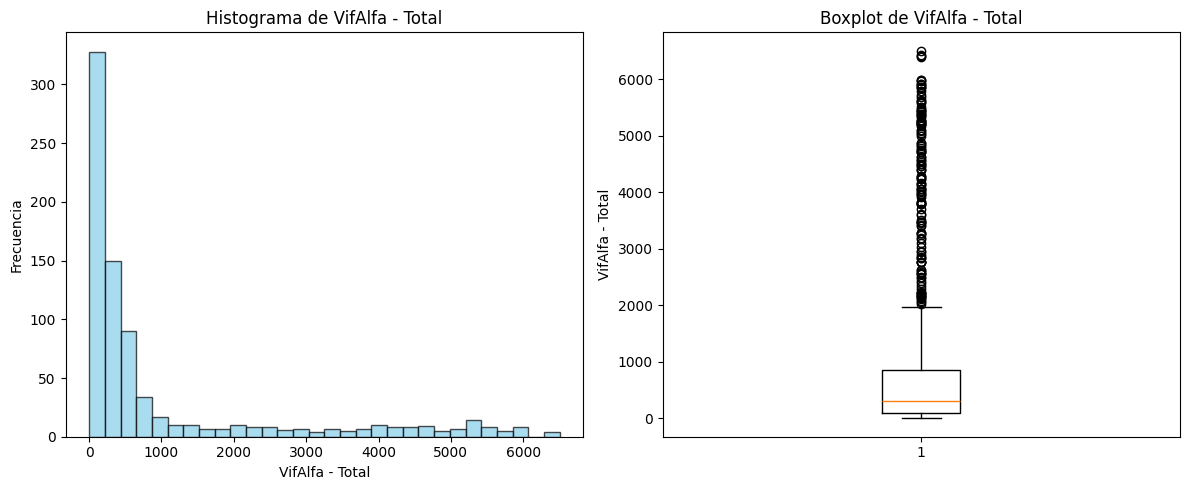

⚠️ La columna 'Alfabeta' tiene 5 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.31109965277739237699
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Alfabeta' NO provienen de una distribución normal.



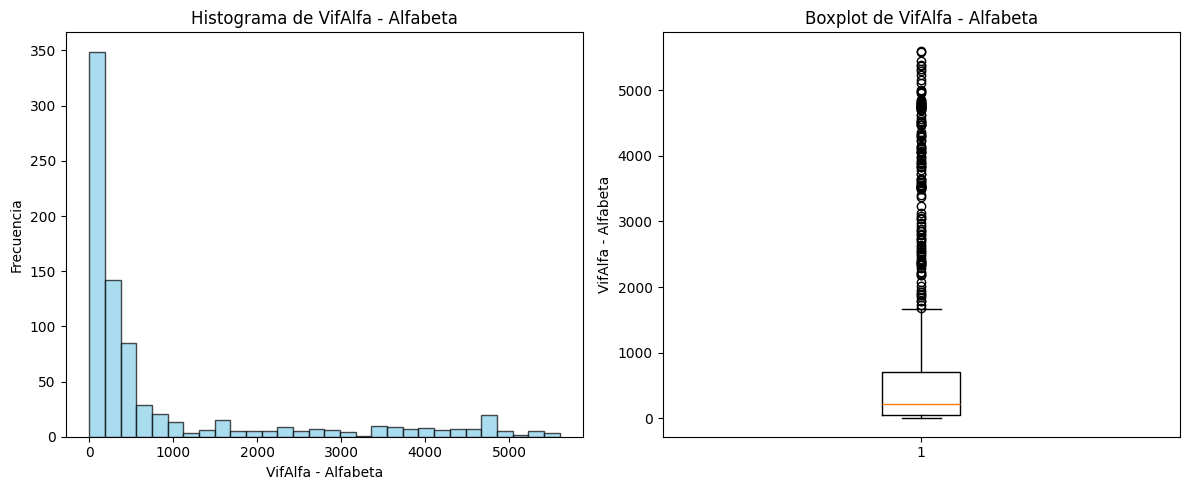

⚠️ La columna 'Analfabeta' tiene 36 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.26049970997823035379
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Analfabeta' NO provienen de una distribución normal.



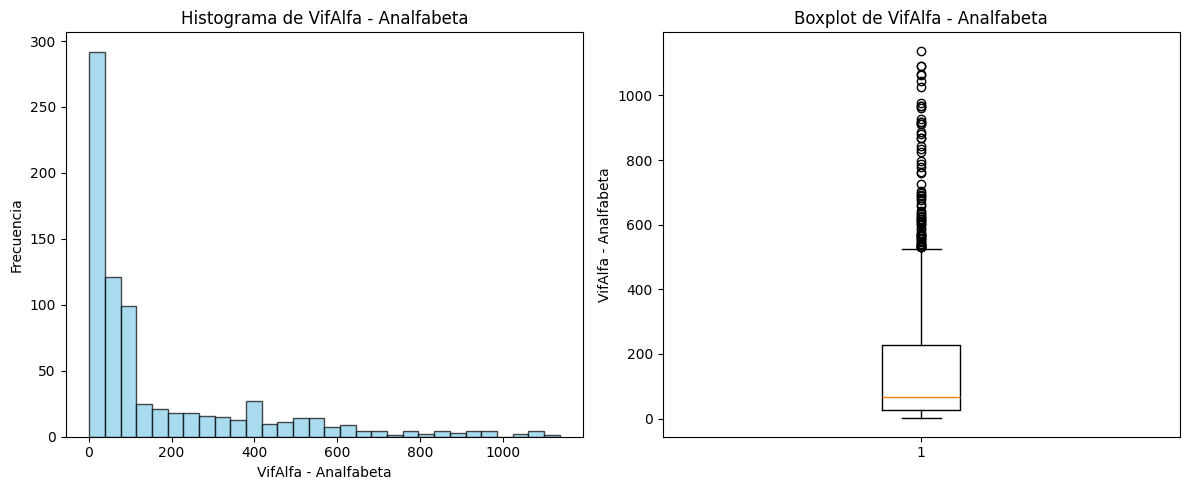

⚠️ La columna 'Ignorado' tiene 174 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.36361010098313217842
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Ignorado' NO provienen de una distribución normal.



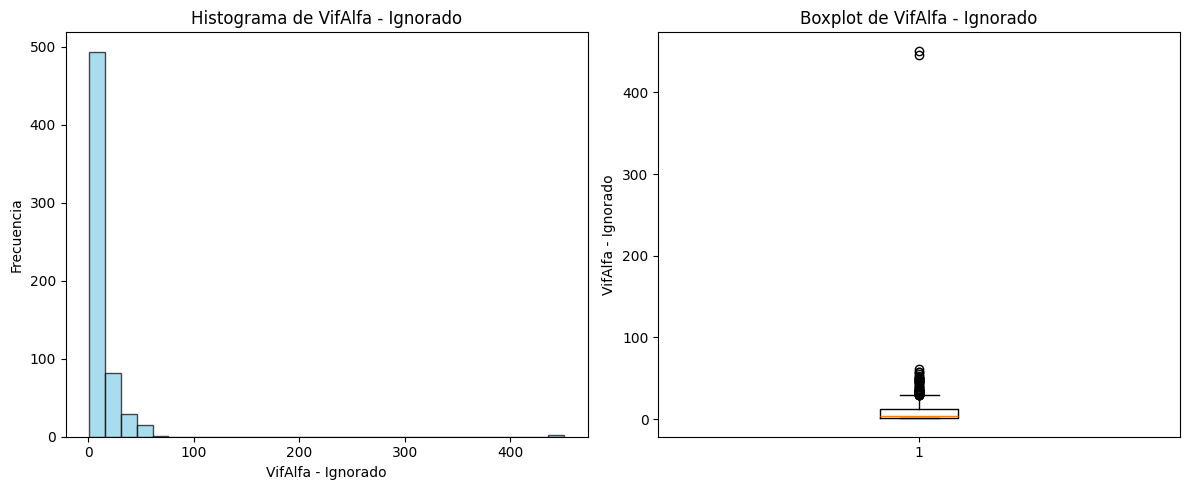

********************************************************************************************

🔹 **Analizando archivo: VifAreaSexoEdad**

Estadístico de prueba (ks_statistic) = 0.30707756020747567494
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Grupos quinquenales de edad' NO provienen de una distribución normal.



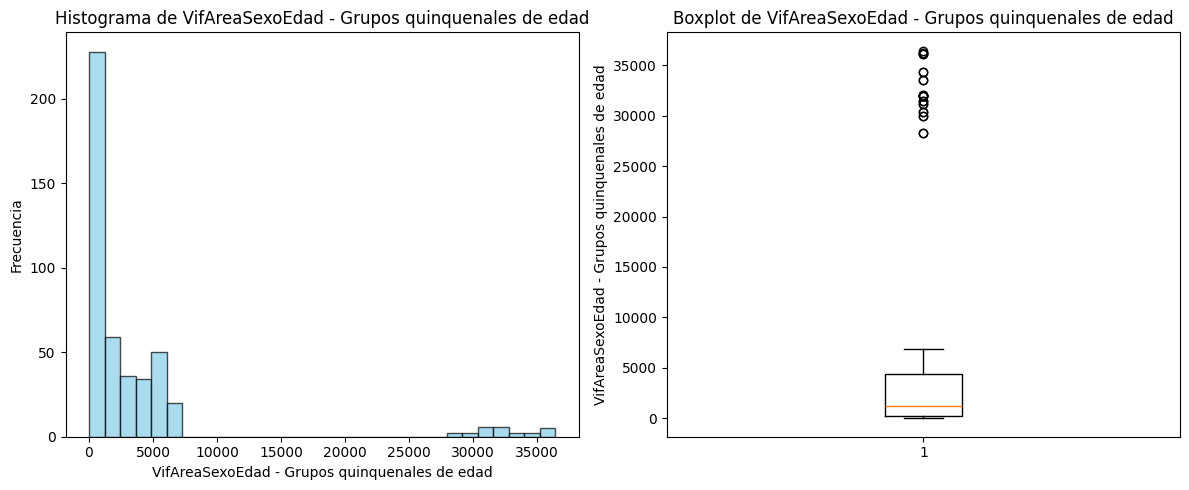

Estadístico de prueba (ks_statistic) = 0.35193324075565535214
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Total' NO provienen de una distribución normal.



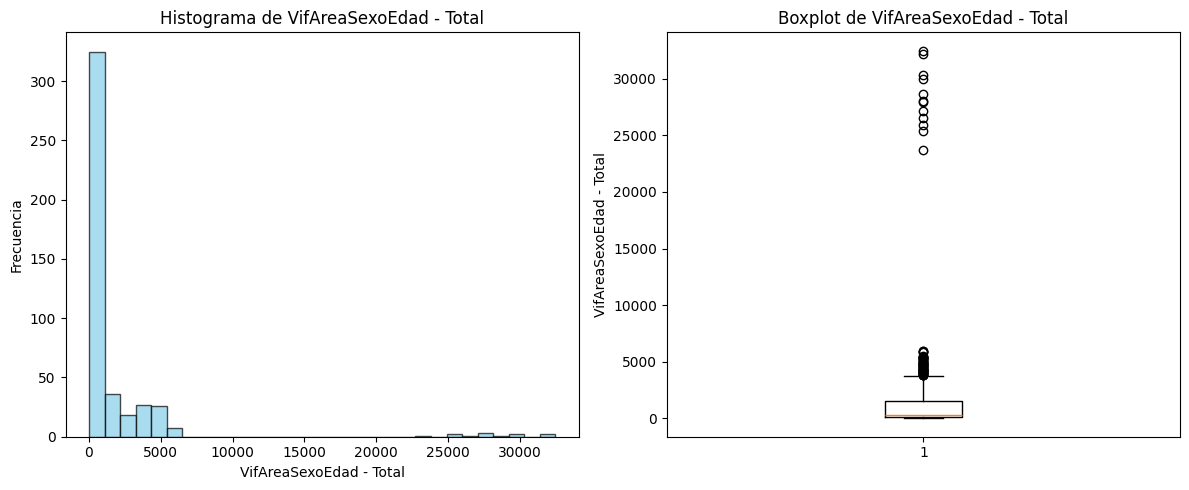

⚠️ La columna 'TotalH' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.35033523802130028812
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalH' NO provienen de una distribución normal.



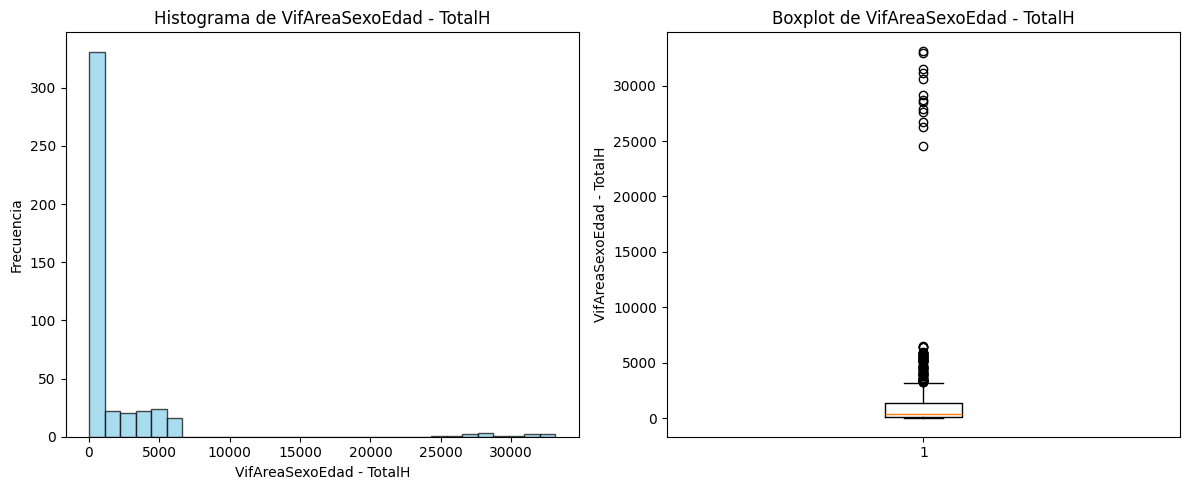

⚠️ La columna 'TotalM' tiene 1 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30737933450234522503
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalM' NO provienen de una distribución normal.



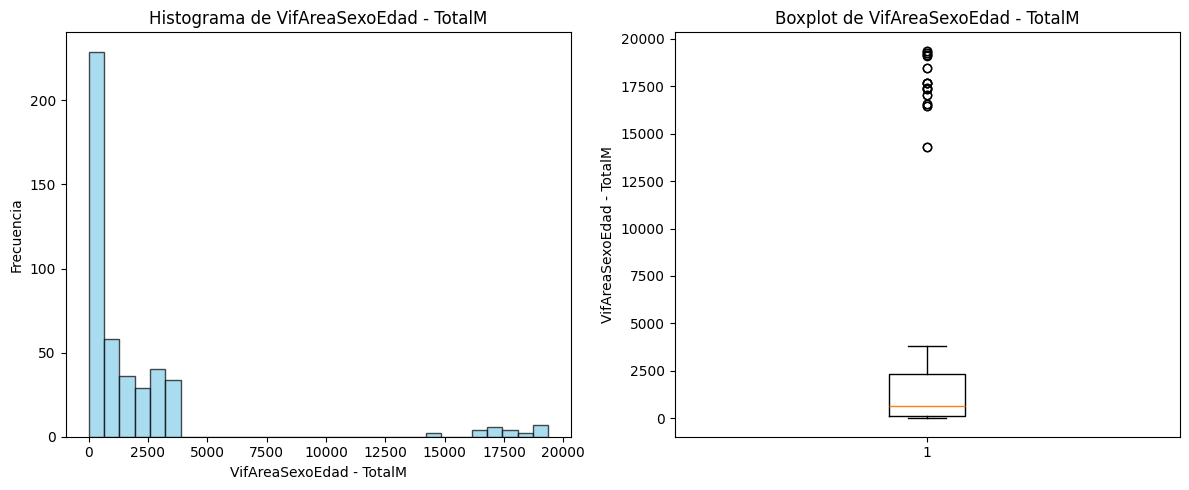

⚠️ La columna 'Urban' tiene 2 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.35192637630241374591
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Urban' NO provienen de una distribución normal.



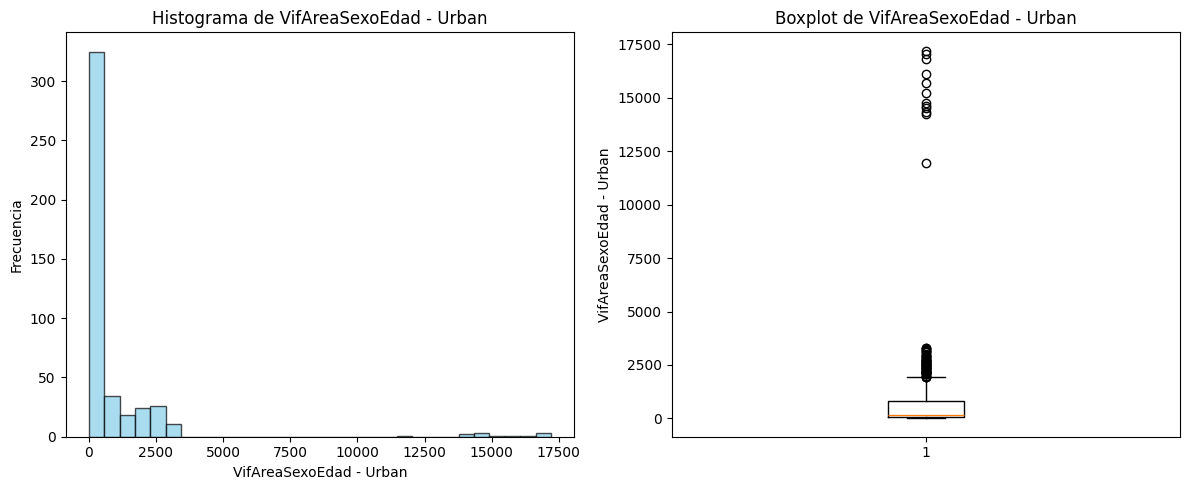

⚠️ La columna 'UrbanH' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.34977183888246321519
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanH' NO provienen de una distribución normal.



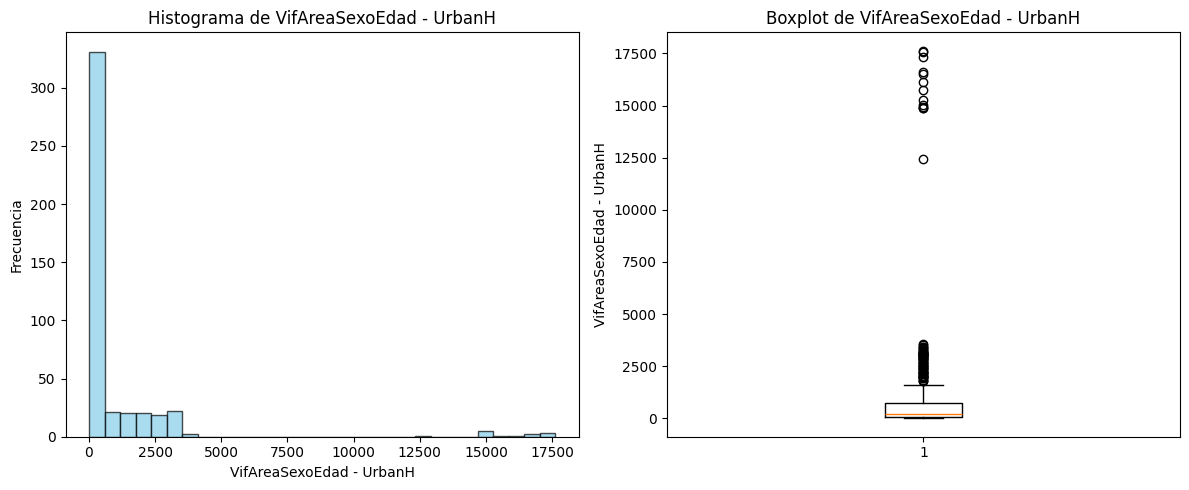

⚠️ La columna 'UrbanM' tiene 2 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30602640834038241646
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanM' NO provienen de una distribución normal.



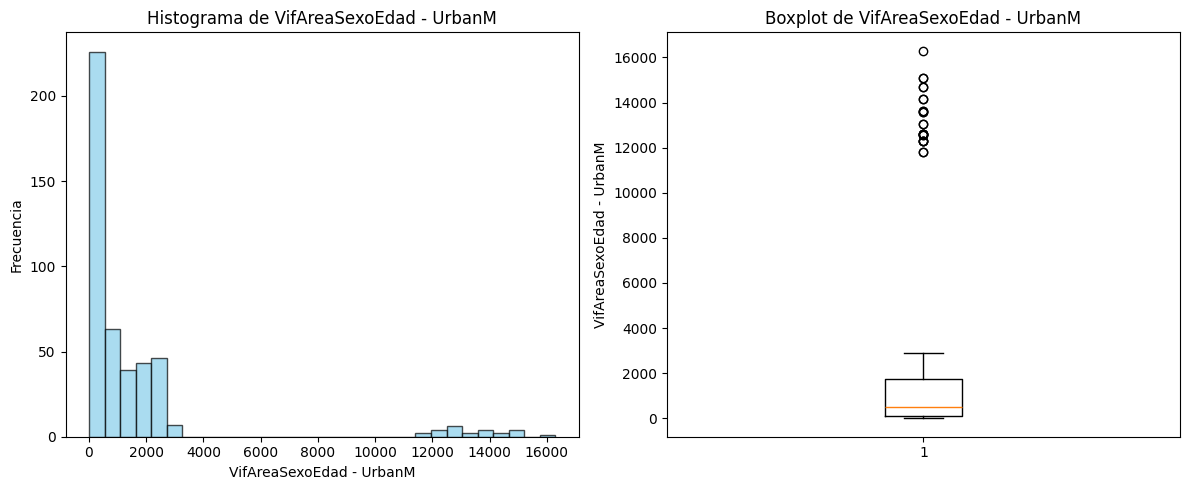

⚠️ La columna 'Rural' tiene 2 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.35119133926673062884
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Rural' NO provienen de una distribución normal.



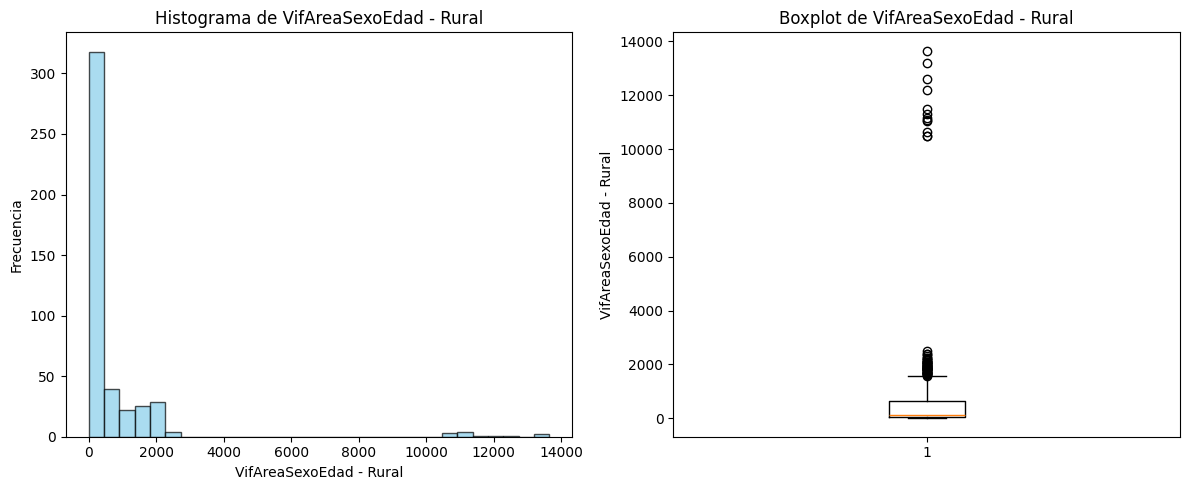

⚠️ La columna 'RuralH' tiene 6 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.35057956327091066573
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralH' NO provienen de una distribución normal.



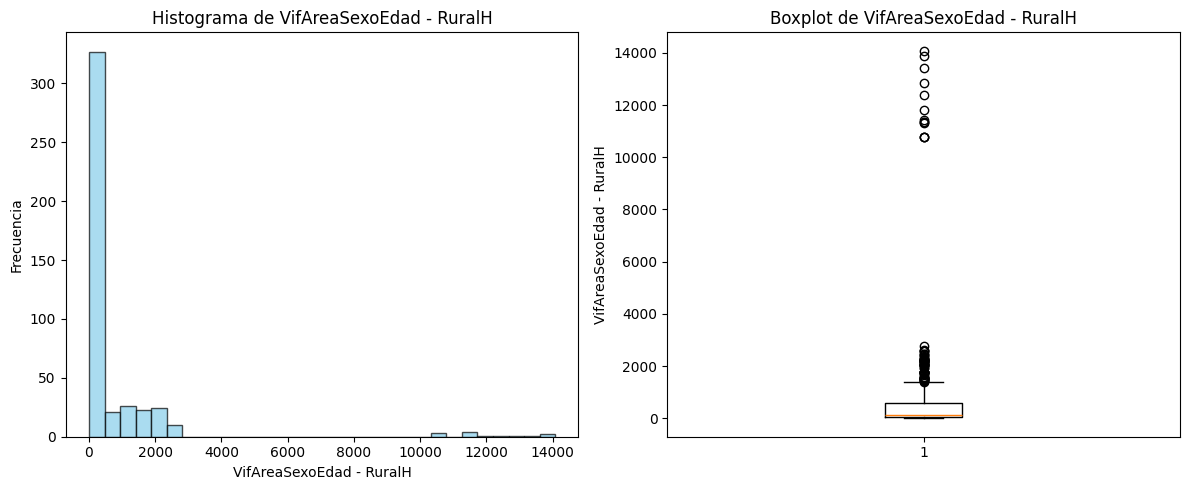

⚠️ La columna 'RuralM' tiene 20 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.33172865292858821906
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralM' NO provienen de una distribución normal.



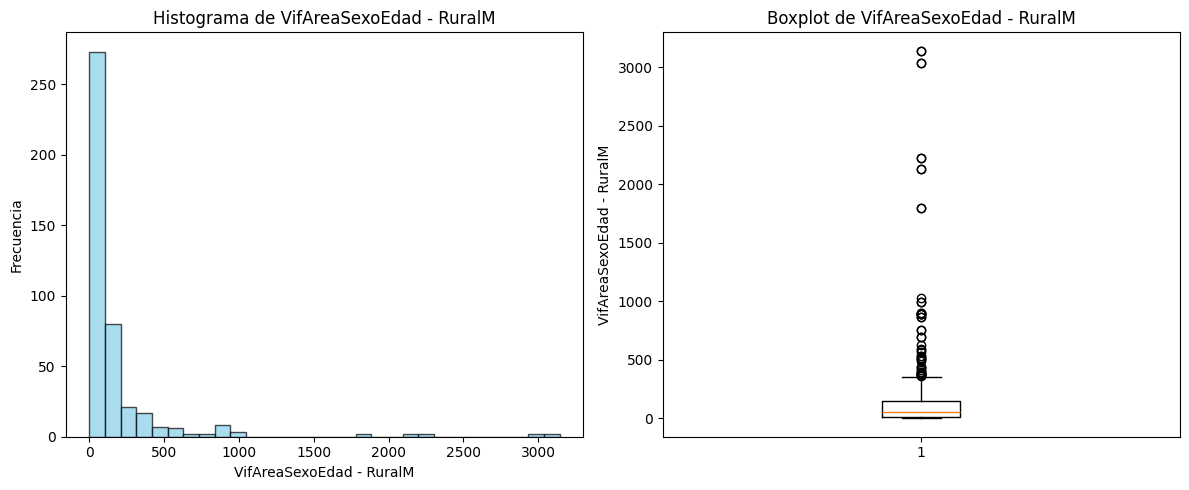

⚠️ La columna 'Ignorado' tiene 33 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.37250409350039848100
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Ignorado' NO provienen de una distribución normal.



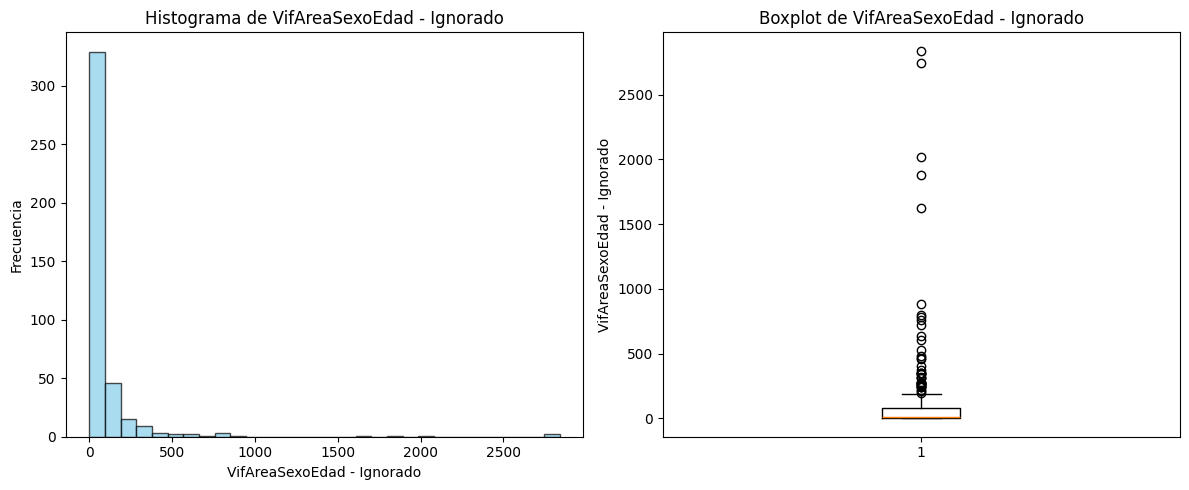

⚠️ La columna 'IgnoradoH' tiene 46 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.36668993192832688433
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - IgnoradoH' NO provienen de una distribución normal.



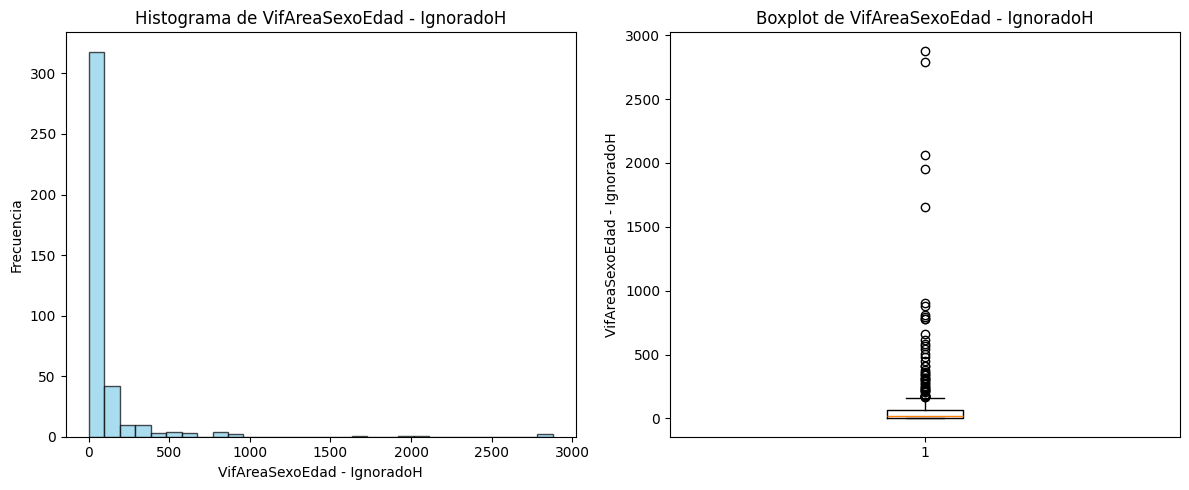

La columna 'VifAreaSexoEdad - IgnoradoM' quedó vacía después de filtrar NaN y/o ceros. No se puede realizar la prueba de normalidad.

Estadístico de prueba (ks_statistic) = 0.09676746908805922143
p-value = 0.00038972730648053694
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Victima o Agresor' NO provienen de una distribución normal.



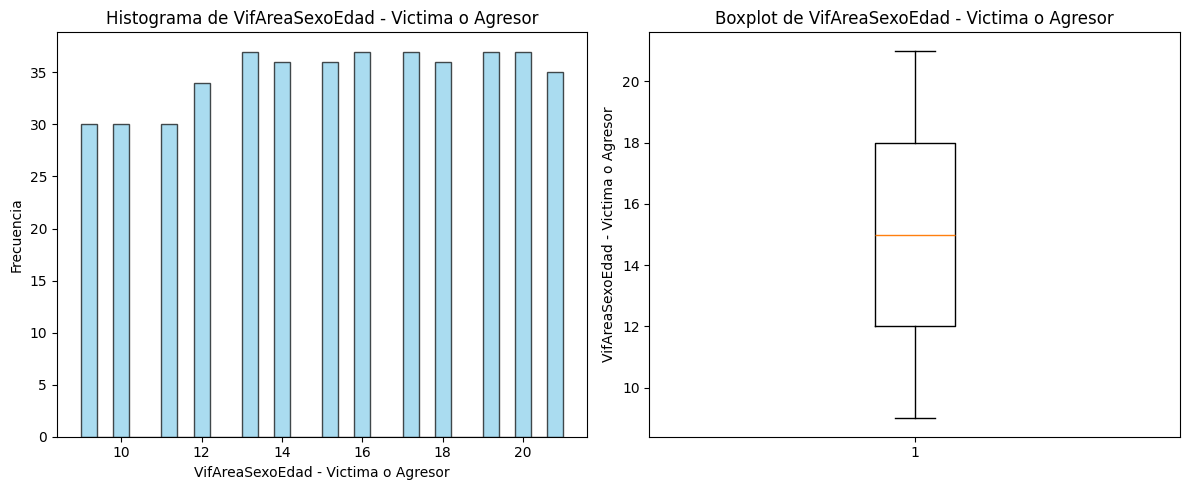

********************************************************************************************

🔹 **Analizando archivo: VifEscolaridad**

⚠️ La columna 'Total' tiene 4 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30318588077079811072
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Total' NO provienen de una distribución normal.



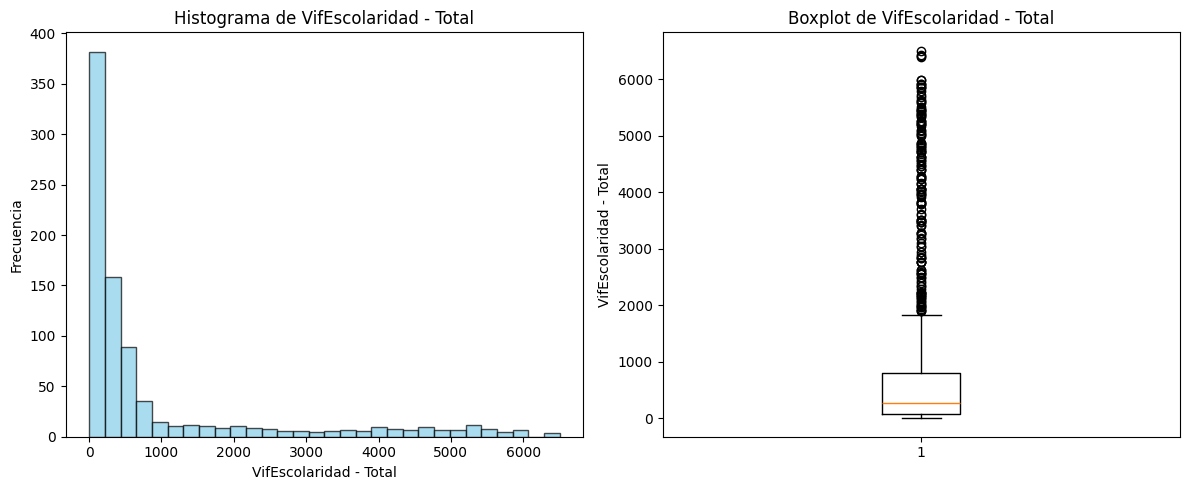

⚠️ La columna 'Ninguno' tiene 33 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.27522871985761571123
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ninguno' NO provienen de una distribución normal.



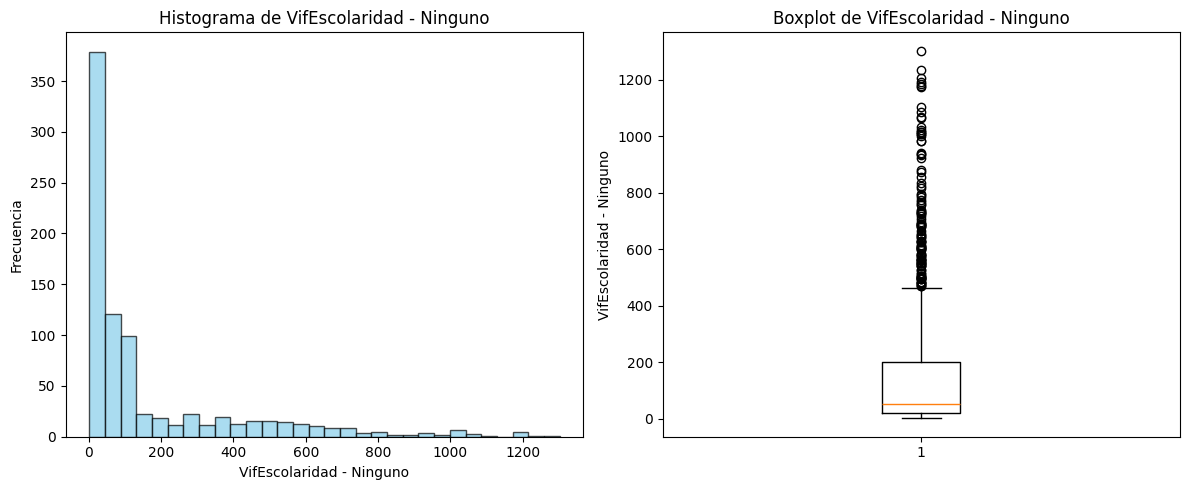

⚠️ La columna 'Primaria' tiene 9 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.29987947860417785151
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Primaria' NO provienen de una distribución normal.



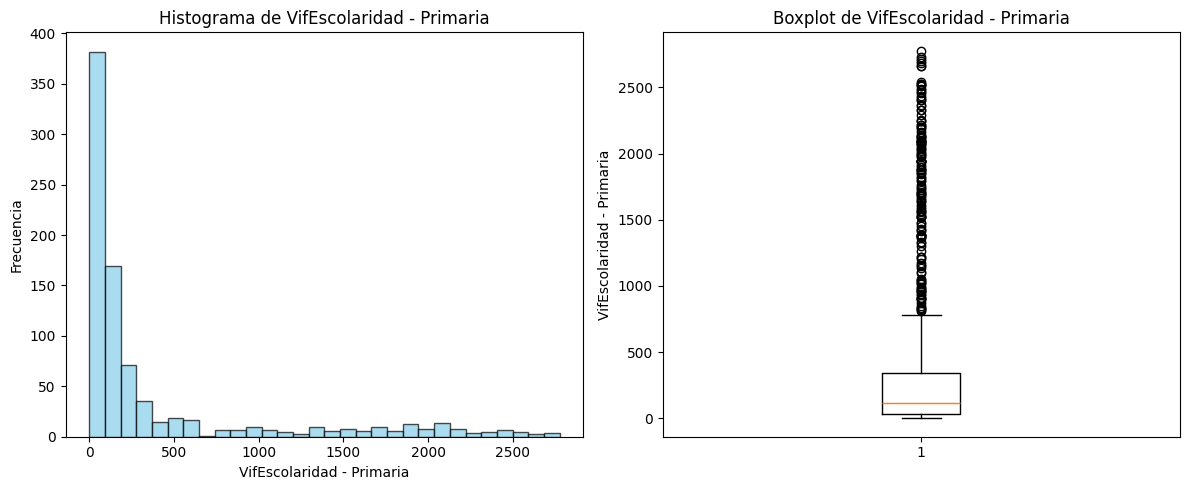

⚠️ La columna 'Básico' tiene 90 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30944844562310136471
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Básico' NO provienen de una distribución normal.



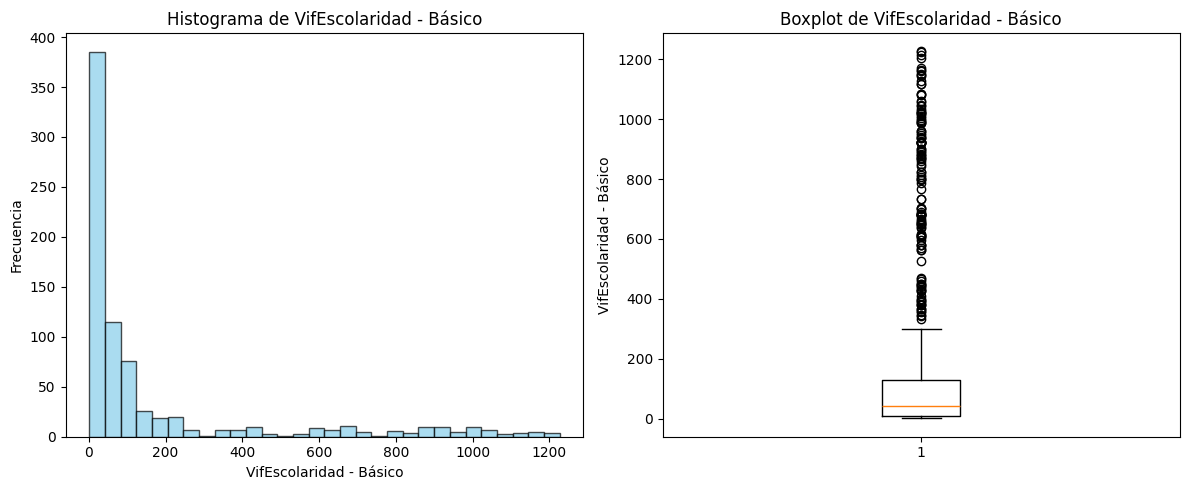

⚠️ La columna 'Diversificado' tiene 140 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30062545296779369375
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Diversificado' NO provienen de una distribución normal.



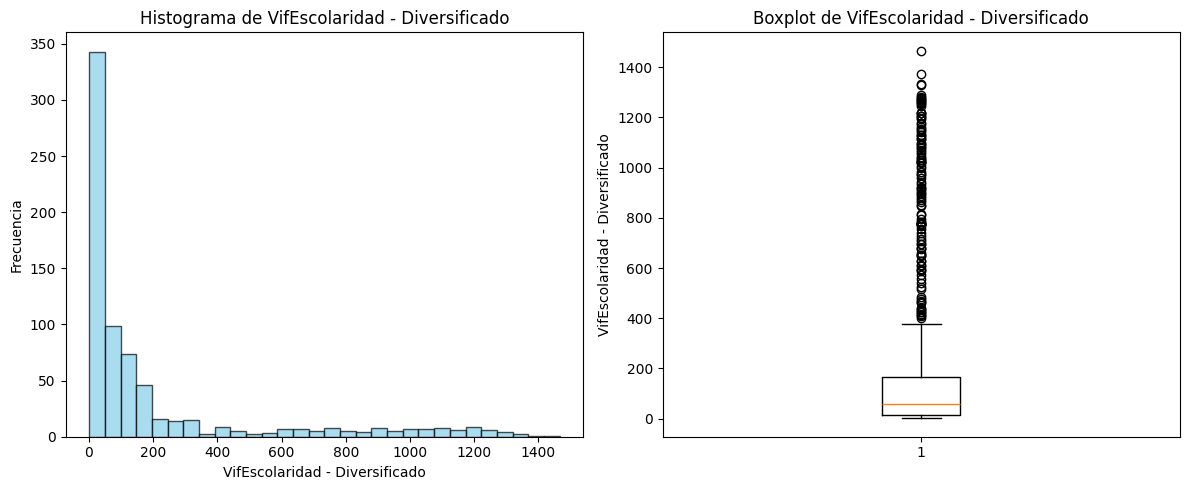

⚠️ La columna 'Universitario' tiene 195 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.25769583780657856487
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Universitario' NO provienen de una distribución normal.



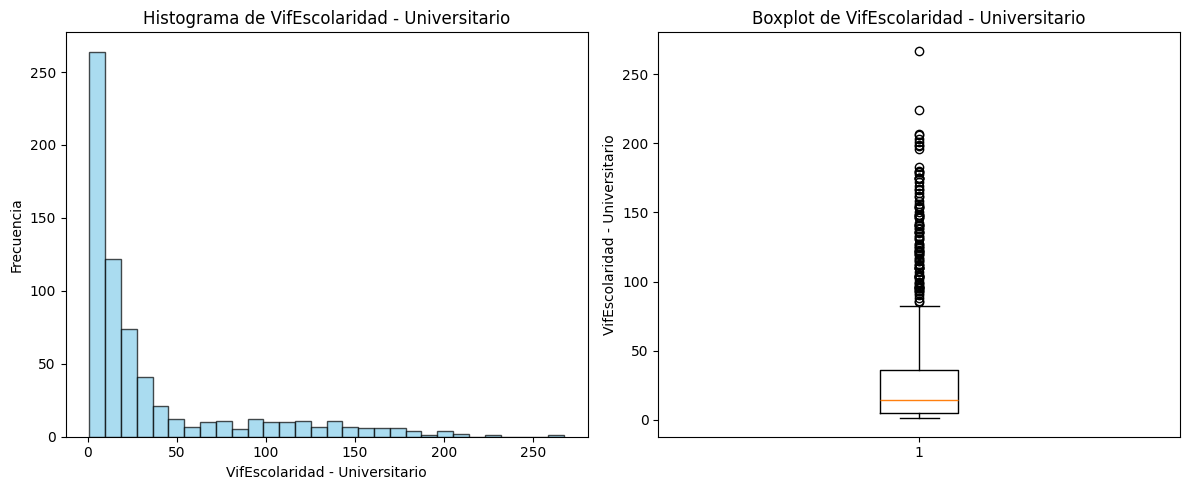

⚠️ La columna 'Ignorado' tiene 102 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.32512134417317395396
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ignorado' NO provienen de una distribución normal.



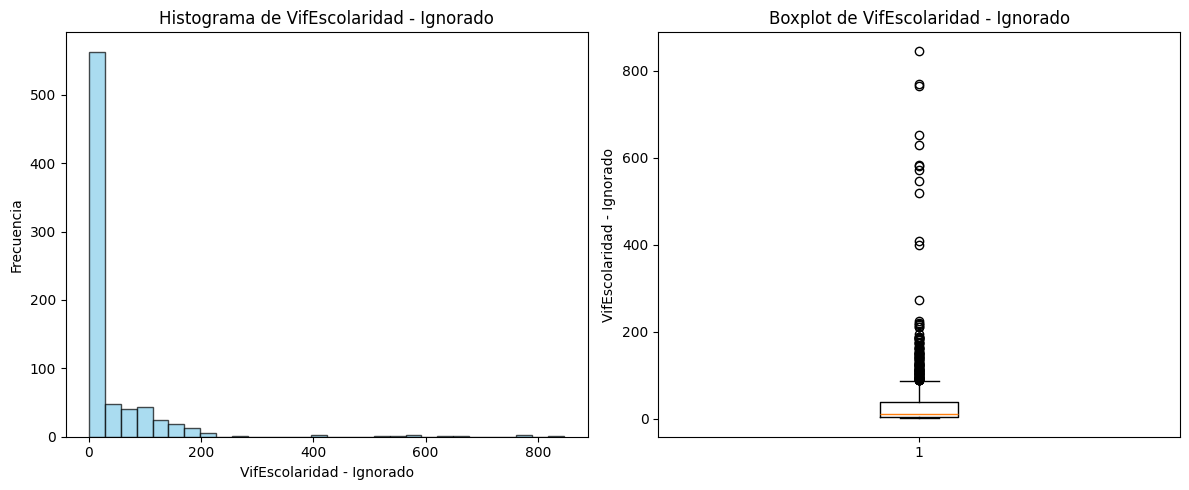

********************************************************************************************

🔹 **Analizando archivo: VifPuebloSexoRelacion**

Estadístico de prueba (ks_statistic) = 0.34157292332588035100
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Total' NO provienen de una distribución normal.



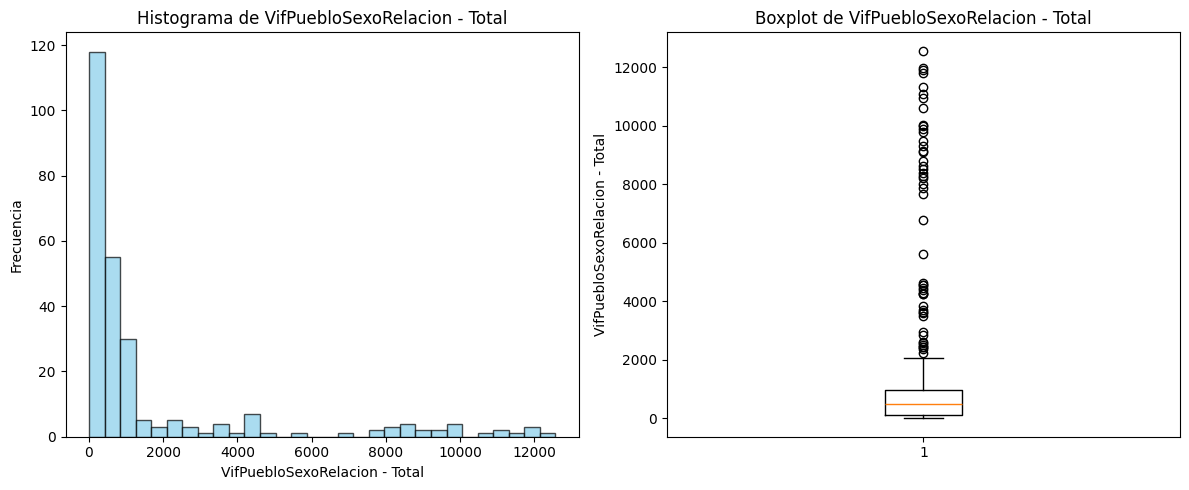

Estadístico de prueba (ks_statistic) = 0.34728655852876011423
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ladinos(as)' NO provienen de una distribución normal.



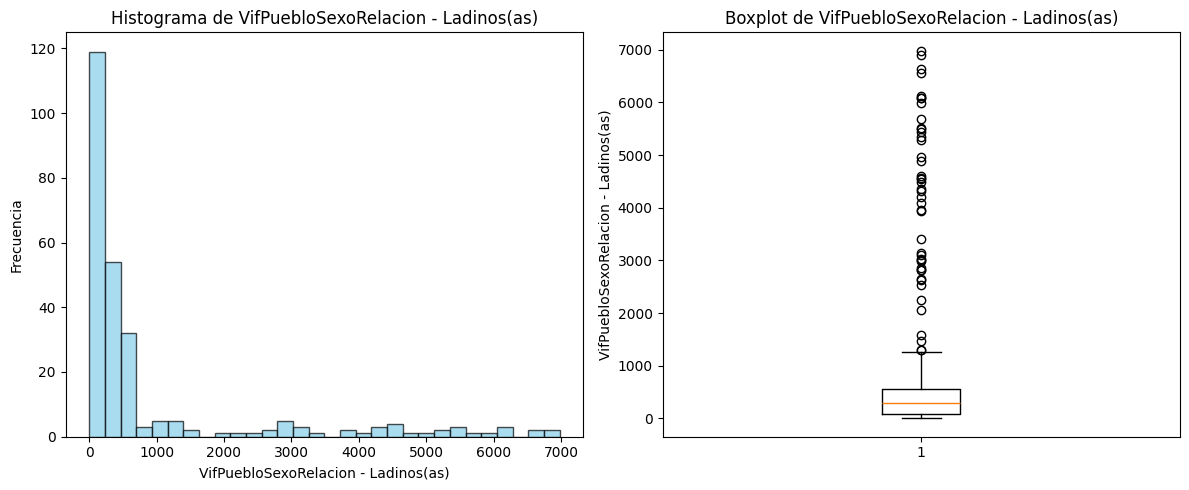

⚠️ La columna 'Mayas' tiene 5 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.31694767916773119998
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Mayas' NO provienen de una distribución normal.



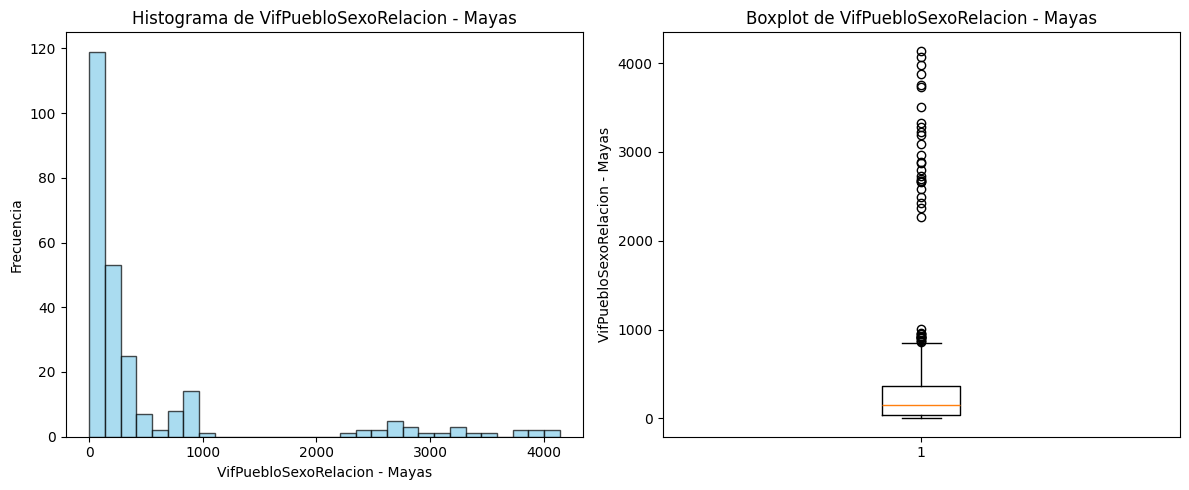

⚠️ La columna 'Garífunas' tiene 127 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.24092571847695964937
p-value = 0.00000102053104664072
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Garífunas' NO provienen de una distribución normal.



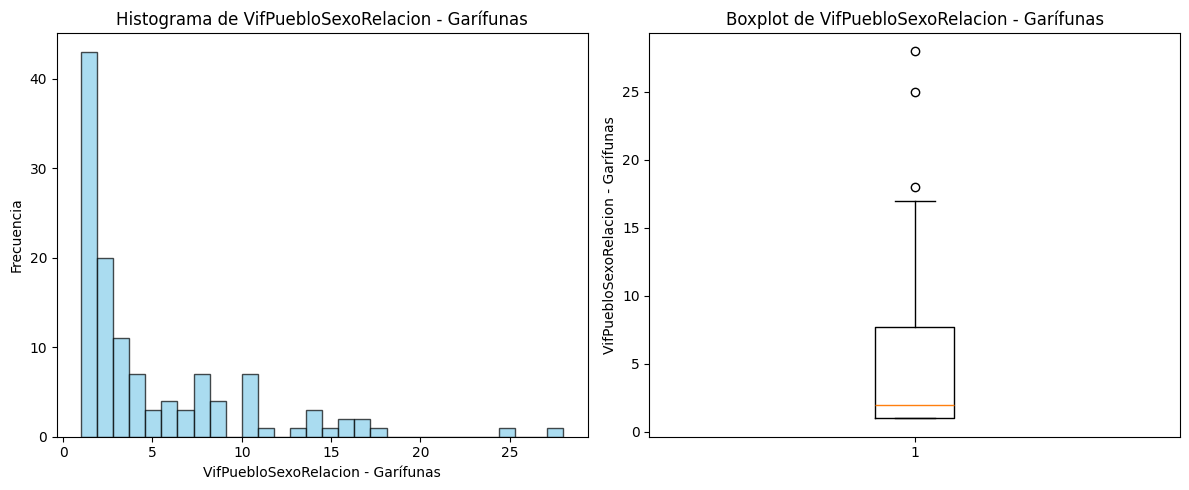

⚠️ La columna 'Xinkas' tiene 130 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29099678314304600057
p-value = 0.00000000120657717984
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Xinkas' NO provienen de una distribución normal.



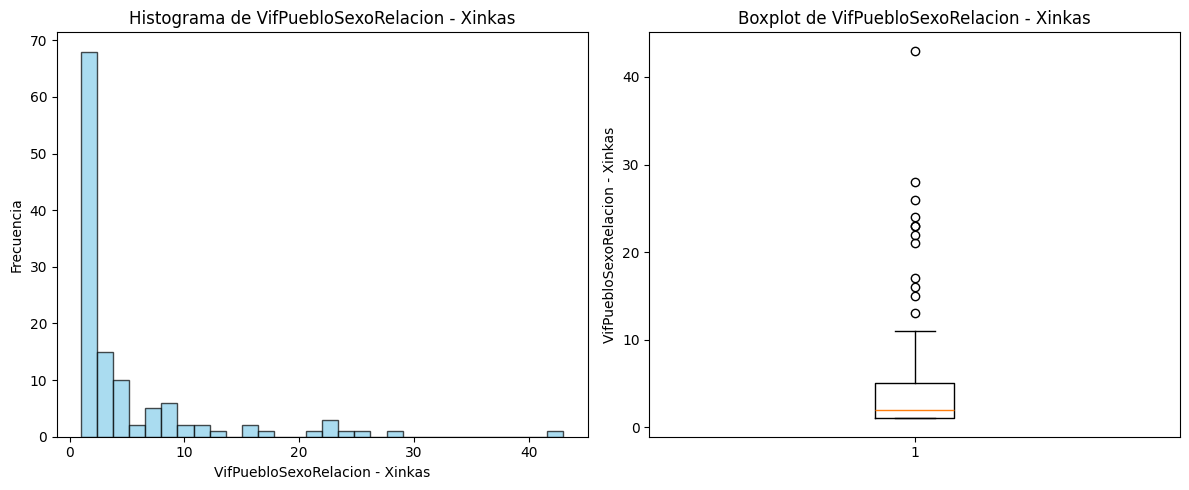

⚠️ La columna 'Otro' tiene 79 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.28673192746887049553
p-value = 0.00000000000051878957
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Otro' NO provienen de una distribución normal.



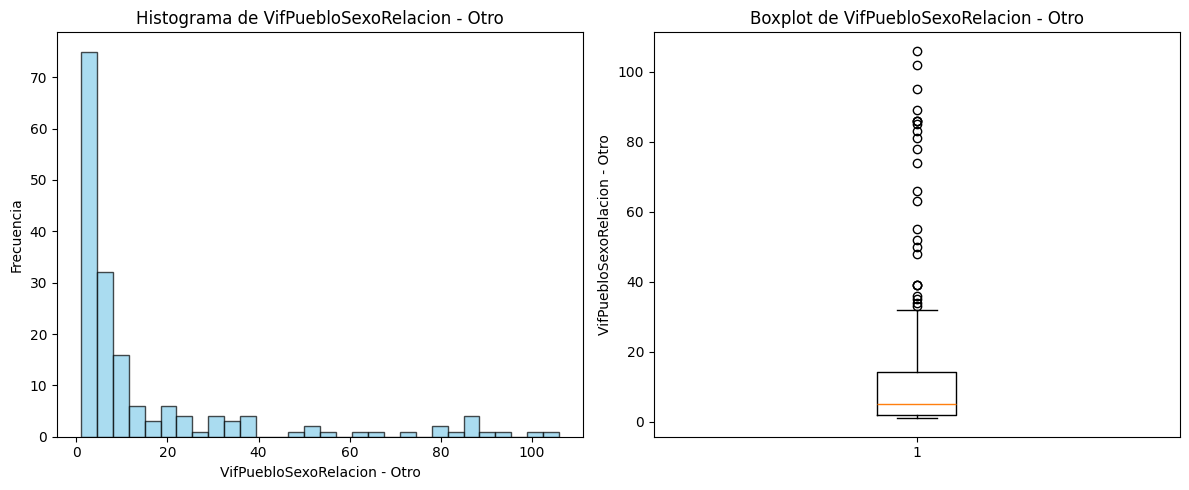

⚠️ La columna 'No indica' tiene 7 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.34086069066334540034
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - No indica' NO provienen de una distribución normal.



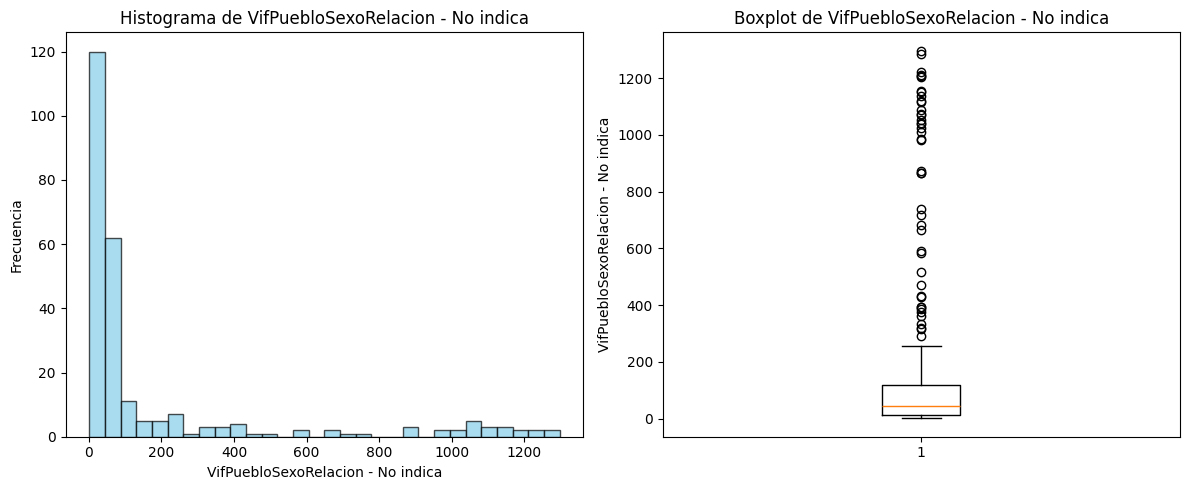

⚠️ La columna 'Ignorado' tiene 28 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29878973354233095971
p-value = 0.00000000000000000152
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ignorado' NO provienen de una distribución normal.



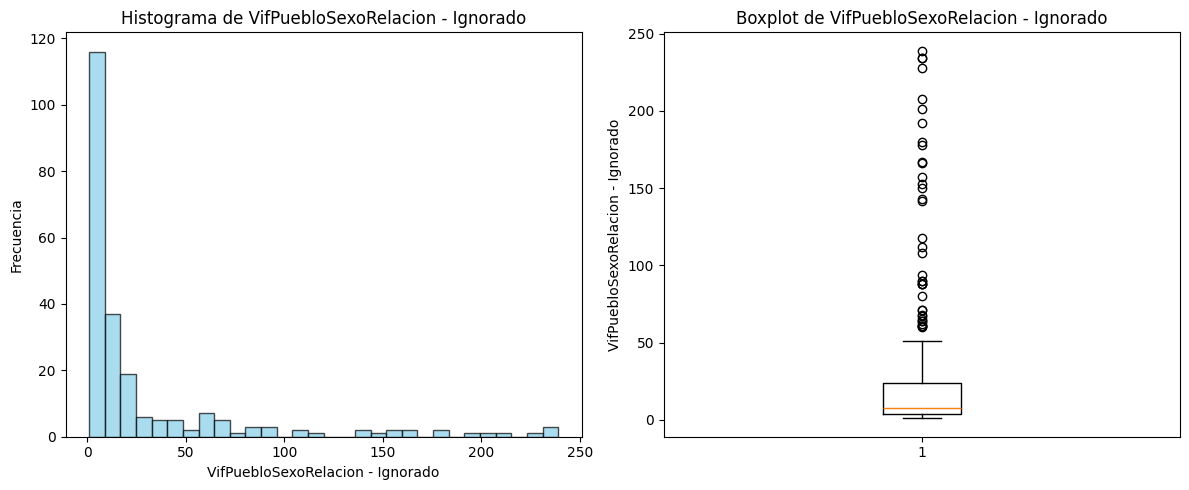

In [13]:
import normalidad

palabras_excluir = ["Total"]

for name, df in dfs.items():
    print("********************************************************************************************")
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cuantitiativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cuantitiativas.remove('Anio')
    
   
     # Filtrar filas que contengan "Todos" o "Todas" en cualquier columna categórica
    df_filtrado = df[~df.select_dtypes(include=[object]).apply(lambda x: x.str.contains('|'.join(palabras_excluir), na=False)).any(axis=1)]
    
    for column in cuantitiativas:  # Solo columnas numéricas
        # Contar los ceros en la columna original
        num_zeros = (df_filtrado[column] == 0).sum()
        
        # Mostrar el número de ceros
        if num_zeros > 0:
            print(f"⚠️ La columna '{column}' tiene {num_zeros} ceros en el archivo '{name}'.")
        
        # Filtrar los ceros de la columna antes de la prueba
        df_filtrado_column = df_filtrado[column].loc[df_filtrado[column] != 0]
        
        # Realizar la prueba solo si hay datos disponibles después de filtrar los ceros
        if not df_filtrado_column.empty:
            normalidad.prueba_de_normalidad(df_filtrado_column, f"{name} - {column}")
        else:
            print(f"⚠️ No hay datos suficientes para realizar la prueba de normalidad en '{name} - {column}' después de eliminar ceros.\n")

       